In [1]:
import pandas as pd #to read and manipulate data
import numpy as np #to have math functions available
from statsmodels.discrete.discrete_model import Logit #to run Logistic Regression
import statsmodels.tools as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
URL = "https://raw.githubusercontent.com/srbuhimirzoyan/Business_Analytics_Spring2020/master/Session_6_turnover_data.csv"

In [3]:
data = pd.read_csv(URL)

In [4]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.shape

(14999, 10)

In [7]:
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 3008
Missing values: 0
Single valued columns: Index([], dtype='object')


In [8]:
data.churn.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: churn, dtype: float64

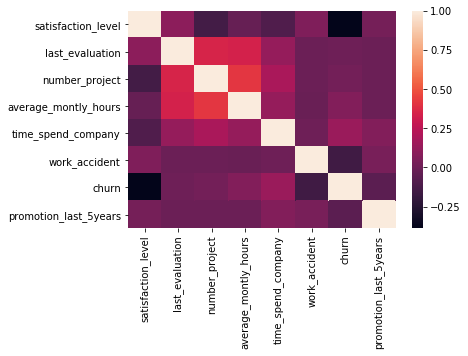

In [9]:
sns.heatmap(data.corr())
plt.show()

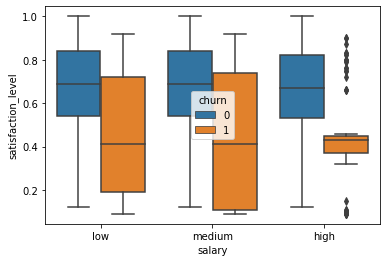

In [10]:
sns.boxplot(x="salary",y="satisfaction_level",hue="churn",data=data)
plt.show()

In [11]:
data.groupby(by="churn")["satisfaction_level"].mean()

churn
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [12]:
data.groupby(by="salary")["satisfaction_level"].mean()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

In [13]:
data.groupby(by="department")["satisfaction_level"].mean()

department
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction_level, dtype: float64

In [14]:
#1 Building
#2 Eval - Recall, Accuracy, ROC AUC
#3 Validation
#4 Prediction
#5 Interpretation

In [15]:
Y = data.churn
X = data.drop("churn",axis=1)

In [16]:
X = pd.get_dummies(X,drop_first=True)

In [17]:
X0, X1, Y0, Y1 = train_test_split(X,Y,random_state=42,test_size = 0.25)

In [18]:
X0 = sm.add_constant(X0)
X1 = sm.add_constant(X1)

C:\Users\Srbuhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
model = Logit(Y0,X0)

In [20]:
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.426662
         Iterations 7


In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                11249
Model:                          Logit   Df Residuals:                    11230
Method:                           MLE   Df Model:                           18
Date:                Sat, 04 Apr 2020   Pseudo R-squ.:                  0.2220
Time:                        21:29:41   Log-Likelihood:                -4799.5
converged:                       True   LL-Null:                       -6169.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6772      0.220     -7.622      0.000      -2.108      -1.246
satisfaction_level        -4.1914      0.114    -36.915      0.000      -4.414      -3.969
last_evaluation            0.6789      0.172      3.936      0.000       0.341       1.017
number_project            -0.3066      0.025    -12.480      0.000      -0.355      -0.258
average_montly_hours       0.0047      0.001      7.820      0.000       0.004       0.006
time_spend_company         0.2646      0.018     14.683      0.000       0.229       0.300
work_accident             -1.5052      0.103    -14.657      0.000      -1.706      -1.304
promotion_last_5years     -1.3486      0.290     -4.649      0.000      -1.917      -0.780
department_RandD          -0.5731      0.161     -3.556      0.000      -0.889      -0.257
department_accounting      0.1222      0.141      0.864      0.388      -0.155       0.400
department_hr              0.4125      0.142      2.912      0.004       0.135       0.690
department_management     -0.2649      0.172     -1.541      0.123      -0.602       0.072
department_marketing       0.2000      0.141      1.414      0.157      -0.077       0.477
department_product_mng     0.0736      0.136      0.540      0.590      -0.194       0.341
department_sales           0.1398      0.103      1.355      0.175      -0.062       0.342
department_support         0.1817      0.113      1.610      0.107      -0.039       0.403
department_technical       0.2437      0.109      2.239      0.025       0.030       0.457
salary_low                 1.9639      0.151     13.028      0.000       1.668       2.259
salary_medium              1.4705      0.152      9.704      0.000       1.173       1.767
==========================================================================================
"""

In [22]:
results.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  churn
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
satisfaction_level        -0.5748      0.012    -48.250      0.000      -0.598      -0.551
last_evaluation            0.0931      0.024      3.944      0.000       0.047       0.139
number_project            -0.0420      0.003    -12.712      0.000      -0.049      -0.036
average_montly_hours       0.0006   8.14e-05      7.892      0.000       0.000       0.001
time_spend_company         0.0363      0.002     15.133      0.000       0.032       0.041
work_accident             -0.2064      0.014    -15.043      0.000      -0.233      -0.180
promotion_last_5years     -0.1849      0.040     -4.660      0.000      -0.263      -0.107
department_RandD          -0.0786      0.022     -3.562      0.000      -0.122      -0.035
department_accounting      0.0168      0.019      0.864      0.388      -0.021       0.055
department_hr              0.0566      0.019      2.916      0.004       0.019       0.095
department_management     -0.0363      0.024     -1.542      0.123      -0.083       0.010
department_marketing       0.0274      0.019      1.414      0.157      -0.011       0.065
department_product_mng     0.0101      0.019      0.540      0.589      -0.027       0.047
department_sales           0.0192      0.014      1.355      0.175      -0.009       0.047
department_support         0.0249      0.015      1.611      0.107      -0.005       0.055
department_technical       0.0334      0.015      2.240      0.025       0.004       0.063
salary_low                 0.2693      0.020     13.292      0.000       0.230       0.309
salary_medium              0.2017      0.021      9.802      0.000       0.161       0.242
==========================================================================================
"""

In [23]:
#train - X0, Y0, Y0_hat
#test  - X1, Y1, Y1_hat

In [24]:
Y0_hat = results.predict(X0)
Y1_hat = results.predict(X1)

In [25]:
Y0_class = np.where(Y0_hat>0.5,1,0)
Y1_class = np.where(Y1_hat>0.5,1,0)

In [26]:
print("Recall Train:",recall_score(Y0,Y0_class))
print("Recall Test:",recall_score(Y1,Y1_class))

Recall Train: 0.34966342557965596
Recall Test: 0.34002229654403565


In [27]:
print("ROC AUC Train:", roc_auc_score(Y0,Y0_hat))
print("ROC AUC Test:", roc_auc_score(Y1,Y1_hat))

ROC AUC Train: 0.8218928849454088
ROC AUC Test: 0.8187618423525705


In [28]:
print("General Accuracy Train:",accuracy_score(Y0,Y0_class))
print("General Accuracy Test:",accuracy_score(Y1,Y1_class))

General Accuracy Train: 0.7911814383500756
General Accuracy Test: 0.7850666666666667


In [29]:
print(classification_report(Y0,Y0_class))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      8575
           1       0.61      0.35      0.44      2674

    accuracy                           0.79     11249
   macro avg       0.71      0.64      0.66     11249
weighted avg       0.77      0.79      0.77     11249



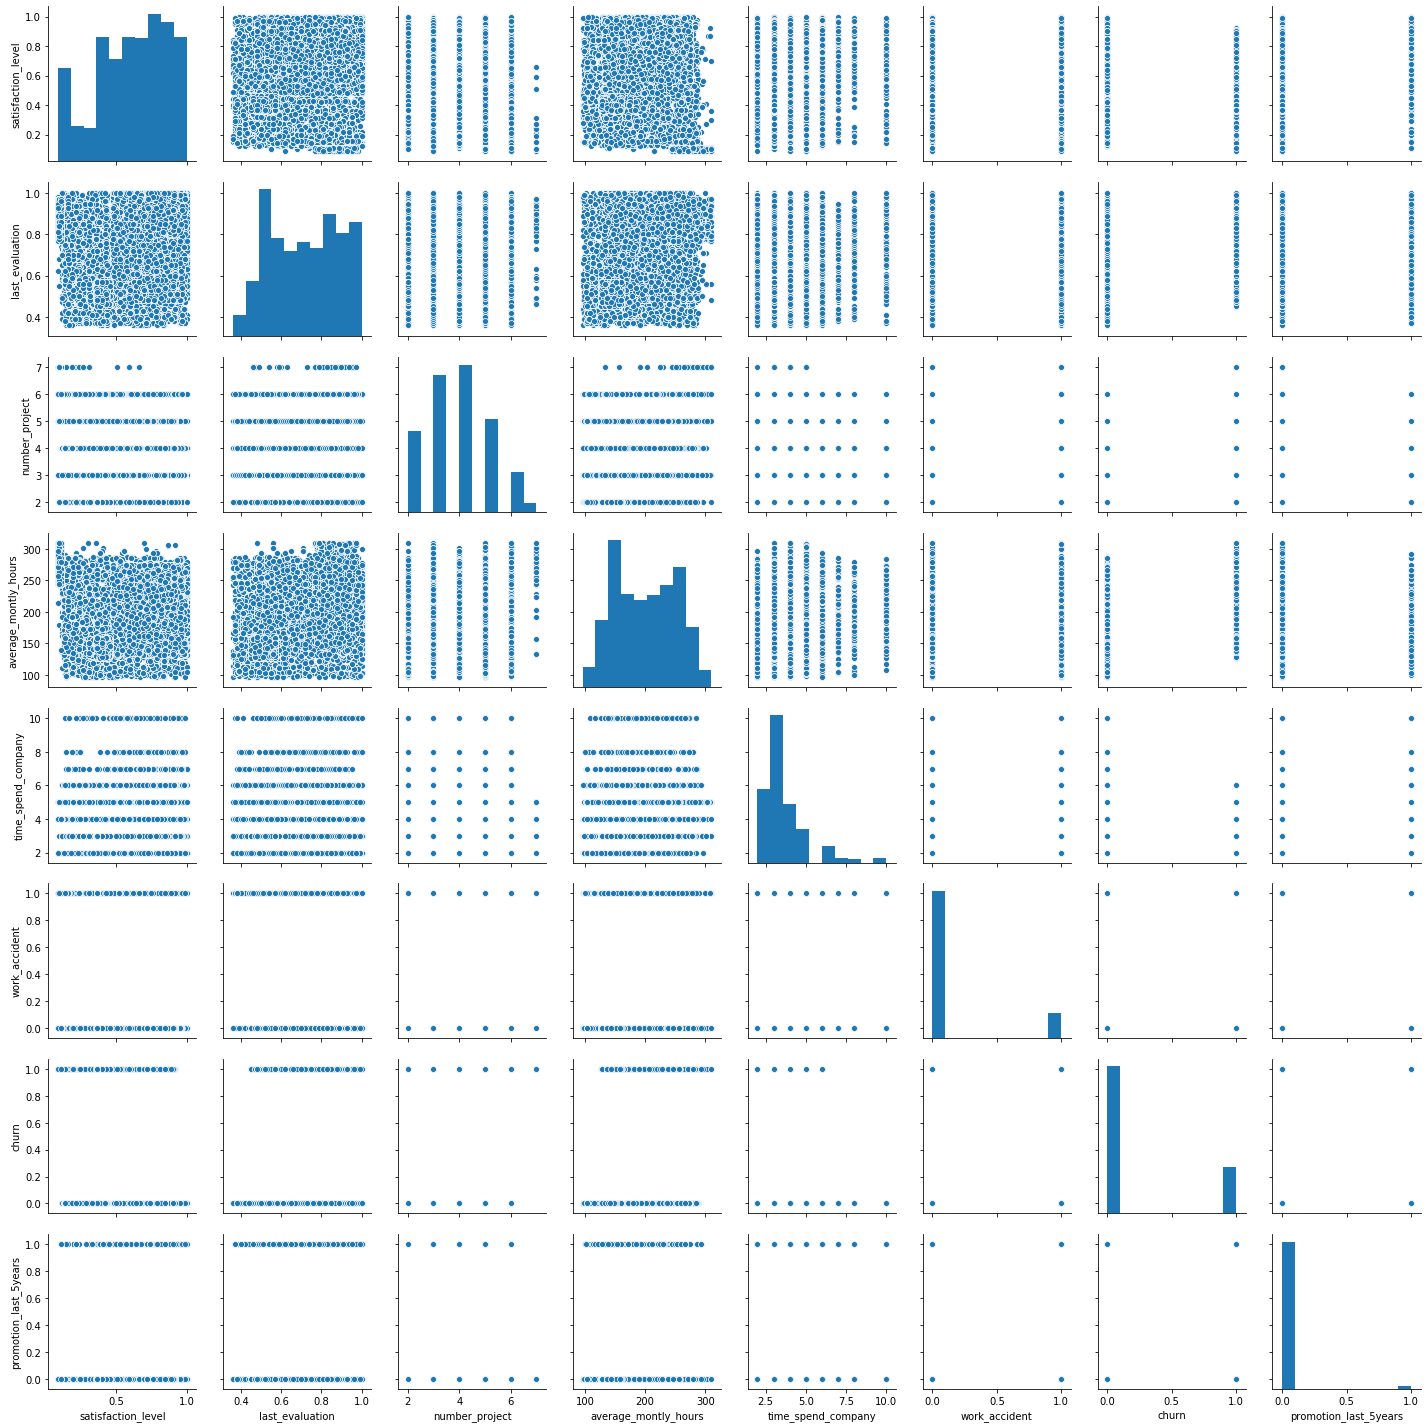

In [30]:
sns.pairplot(data)
plt.show()